<a href="https://colab.research.google.com/github/palak-29/StockSight/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
nx = pd.read_csv("NFLX.csv")
print(nx.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


## Performing EDA

In [22]:
nx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [23]:
nx.shape

(1009, 7)

In [24]:
nx.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


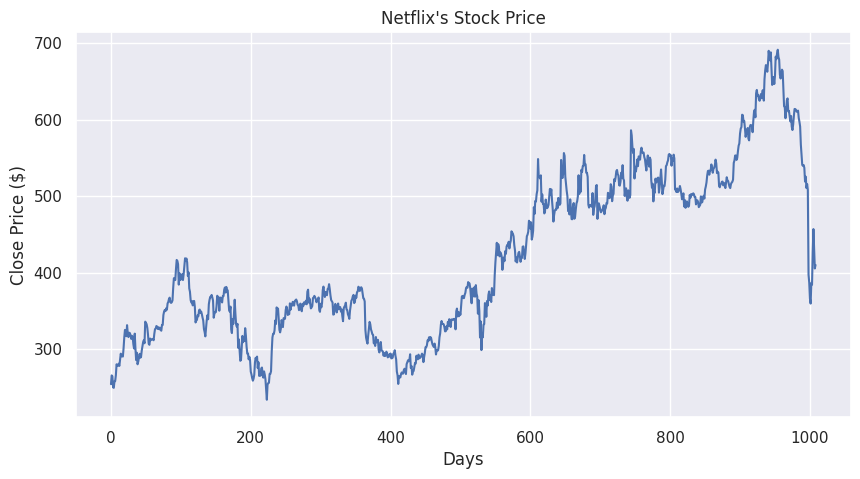

In [25]:
sns.set()
plt.figure(figsize=(10, 5))
plt.title("Netflix's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price ($)")
plt.plot(nx["Close"])
plt.show()

In [26]:
nx = nx[["Close"]]
print(nx.head())

        Close
0  254.259995
1  265.720001
2  264.559998
3  250.100006
4  249.470001


In [27]:
futureDays = 90

In [28]:
nx.loc[:, "Prediction"] = nx["Close"].shift(-futureDays)
print(nx.head())
print(nx.tail())

        Close  Prediction
0  254.259995  392.869995
1  265.720001  391.980011
2  264.559998  390.399994
3  250.100006  404.980011
4  249.470001  416.760010
           Close  Prediction
1004  427.140015         NaN
1005  457.130005         NaN
1006  429.480011         NaN
1007  405.600006         NaN
1008  410.170013         NaN


##  Data Preprocessing

In [32]:
x = np.array(nx.drop(["Prediction"], axis=1))[:-futureDays]
print(x)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

In [33]:
y = np.array(nx["Prediction"])[:-futureDays]
print(y)

[392.869995 391.980011 390.399994 404.980011 416.76001  415.440002
 411.089996 384.480011 399.390015 390.390015 395.420013 391.429993
 398.179993 390.519989 398.390015 408.25     418.970001 415.630005
 418.649994 413.5      395.799988 400.480011 379.480011 375.130005
 364.230011 361.049988 362.660004 357.320007 362.869995 363.089996
 355.209991 334.959991 337.450012 338.380005 344.5      343.089996
 350.920013 351.829987 347.609985 349.359985 345.869995 341.309998
 337.48999  326.399994 322.440002 316.779999 327.730011 338.019989
 344.440002 339.170013 358.820007 364.579987 368.48999  368.040009
 370.980011 367.679993 363.600006 341.179993 346.459991 348.679993
 348.410004 355.929993 369.950012 368.149994 364.559998 350.350006
 367.649994 366.959991 365.359985 361.190002 369.609985 369.429993
 377.880005 380.709991 374.130005 381.429993 377.140015 377.049988
 363.649994 351.350006 349.100006 355.709991 325.890015 321.100006
 339.559998 333.130005 346.399994 364.700012 346.709991 332.67

## Model Training

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

## Creating models for prediction

### 1. Decision tree regressor model

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

### 2. Linear Regression model

In [36]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [37]:
xfuture = nx.drop(columns=["Prediction"]).iloc[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[497.890015]
 [502.899994]
 [501.339996]
 [502.359985]
 [503.859985]
 [502.809998]
 [499.079987]
 [499.23999 ]
 [489.429993]
 [494.73999 ]
 [494.660004]
 [492.390015]
 [485.809998]
 [487.269989]
 [488.769989]
 [499.890015]
 [491.899994]
 [492.410004]
 [498.339996]
 [500.769989]
 [497.      ]
 [508.820007]
 [512.73999 ]
 [518.059998]
 [527.070007]
 [533.030029]
 [533.5     ]
 [528.210022]
 [533.539978]
 [533.97998 ]
 [541.640015]
 [535.960022]
 [530.76001 ]
 [535.97998 ]
 [537.309998]
 [540.679993]
 [547.950012]
 [542.950012]
 [530.309998]
 [532.280029]
 [531.049988]
 [513.630005]
 [511.769989]
 [515.409973]
 [516.48999 ]
 [518.909973]
 [519.299988]
 [514.25    ]
 [517.570007]
 [515.150024]
 [510.820007]
 [517.349976]
 [524.890015]
 [520.549988]
 [519.969971]
 [515.840027]
 [512.400024]
 [510.720001]
 [515.919983]
 [517.919983]
 [518.909973]
 [521.869995]
 [543.710022]
 [546.880005]
 [553.330017]
 [553.409973]
 [547.580017]
 [550.119995]
 [558.919983]
 [566.179993]
 [569.190002]
 [582.

### To see Decision Treee Model Prediction

In [39]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_1 = mean_absolute_error(xtrain, ytrain)
mse_1 = mean_squared_error(xtrain, ytrain)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(xtrain, ytrain)

print(mae_1)
print(mse_1)
print(rmse_1)
print(r2_1)

Decision Tree prediction = [599.059998 610.340027 613.150024 503.220001 582.869995 486.769989
 493.600006 493.600006 627.039978 624.940002 629.76001  633.799988
 628.289978 637.969971 639.       625.140015 653.159973 633.799988
 671.659973 668.52002  524.440002 674.049988 690.309998 681.169983
 677.719971 688.289978 668.400024 488.23999  651.450012 655.98999
 646.909973 657.580017 682.609985 679.330017 687.400024 691.690002
 682.02002  678.799988 550.640015 654.059998 658.289978 520.549988
 663.840027 641.900024 617.77002  614.090027 602.130005 612.690002
 611.659973 641.900024 611.       611.659973 604.559998 537.309998
 605.039978 591.059998 586.72998  611.       604.919983 614.23999
 614.090027 613.119995 678.799988 610.539978 612.090027 568.209991
 597.369995 530.76001  567.52002  499.23999  541.059998 387.149994
 540.840027 537.219971 519.200012 525.690002 515.859985 515.859985
 359.700012 397.5      387.149994 366.420013 359.700012 386.700012
 386.700012 427.140015 405.600006 429

### To see Linear Regression Model Prediction

In [41]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_2 = mean_absolute_error(xtrain, ytrain)
mse_2 = mean_squared_error(xtrain, ytrain)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(xtrain, ytrain)

print(mae_2)
print(mse_2)
print(rmse_2)
print(r2_2)

Linear regression Prediction = [511.39651886 515.63845375 514.3176079  515.18122967 516.45127539
 515.5622544  512.40406475 512.53953883 504.23344242 508.7294017
 508.66167778 506.73968458 501.168403   502.40457321 503.67461892
 513.08991314 506.3247852  506.75660921 511.77751648 513.83498461
 510.6429457  520.65091183 523.96995023 528.47438579 536.10313465
 541.14946824 541.54739134 537.06838209 541.5812406  541.95378903
 548.43951877 543.63028493 539.22744964 543.64718332 544.77330575
 547.62667088 553.78217518 549.54868948 538.84642577 540.51444538
 539.47297318 524.72352339 523.14865316 526.2306172  527.14506451
 529.19405719 529.52428178 525.24847138 528.05951181 526.01051913
 522.34430611 527.8732122  534.25734166 530.58265321 530.09155447
 526.59474269 523.68210199 522.25963132 526.66244121 528.35583549
 529.19405719 531.70029936 550.19218777 552.87620332 558.33741004
 558.40510855 553.46890148 555.61949359 563.07041827 569.21744797
 571.76601399 582.6714774  588.15805878 589.83

## Visualising predictions

### 1. Decision Tree Predictions

<ipython-input-44-2519d5cf5a8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, "Predictions"] = predictions


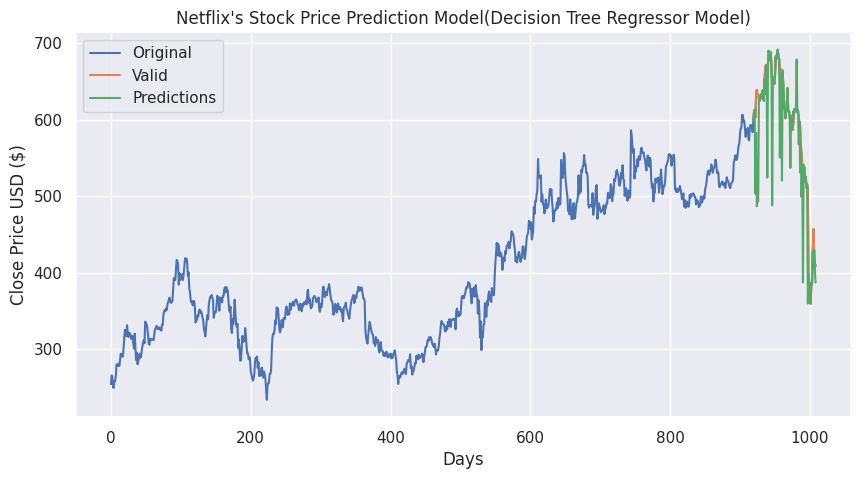

In [44]:
predictions = treePrediction
valid = nx[x.shape[0]:]
valid.loc[:, "Predictions"] = predictions
plt.figure(figsize=(10, 5))
plt.title("Netflix's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(nx["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

### 2. Linear Model Predictions

<ipython-input-43-8315ffdc18e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


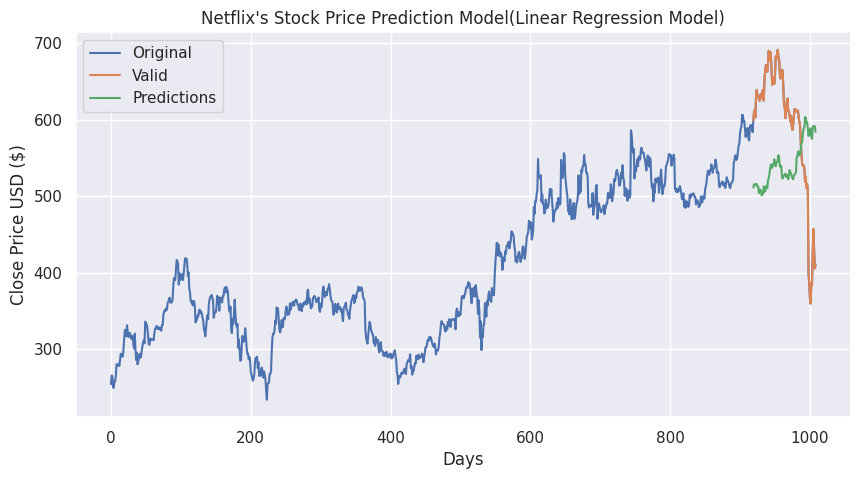

In [43]:
predictions = linearPrediction
valid = nx[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 5))
plt.title("Netflix's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(nx["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()